## Một phương trình vô cùng nguy hiểm

Trong bài báo khoa học nổi tiếng vào năm 2007, Howard Wainer đã viết về một số phương trình vô cùng nguy hiểm:

"Một số phương trình nguy hiểm nếu ta biết chúng, và một số khác nguy hiểm nếu ta không biết chúng. Loại thứ nhất nguy hiểm vì trong phạm vi của chúng ẩn chứa những bí mật có thể mở ra mối nguy khủng khiếp. Một ví dụ điển hình là phương trình của Einstein \\(E = MC^2\\), dùng để đo lường nguồn năng lượng khổng lồ ẩn bên trong các vật chất thông thường. \[...\] Tuy nhiên, tôi lại hứng thú với những phương trình bộc lộ tính nguy hiểm không phải khi ta biết về chúng, mà là khi ta thiếu hiểu biết về chúng. Nắm được những phương trình này giúp ta hiểu sự việc một cách rõ ràng; ngược lại, ta sẽ rơi vào tình trạng thiếu hiểu biết đầy nguy hiểm." 

Phương trình mà ông nhắc đến là công thức Moivre:

$
SE = \dfrac{\sigma}{\sqrt{n}} 
$

trong đó $SE$ là sai số chuẩn của giá trị trung bình, $\sigma$ là độ lệch chuẩn và $n$ là kích thước mẫu. Nghe có vẻ như là một công thức toán mà các chiến binh thực thụ nên nằm lòng, vậy hãy cùng xem xét nó. 

Để lý giải tại sao việc không biết công thức này lại vô cùng nguy hiểm, hãy nhìn vào một số dữ liệu về giáo dục. Tôi đã tổng hợp dữ liệu về điểm ENEM (điểm trong kỳ thi trung học phổ thông chuẩn hoá của Brazil, tương tự như SAT) từ những trường khác nhau trong thời gian 3 năm. Việc làm sạch dữ liệu cũng được thực hiện để chỉ giữ lại những thông tin liên quan. Dữ liệu gốc có thể được tải về tại [Inep website](http://portal.inep.gov.br/web/guest/microdados#). 

Nếu nhìn vào những trường top đầu, ta dễ nhận thấy một đặc điểm: những trường này có số lượng học sinh tương đối nhỏ. 



In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")

df = pd.read_csv("./data/enem_scores.csv")
df.sort_values(by="avg_score", ascending=False).head(10)

,year,school_id,number_of_students,avg_score
16670,2007,33062633,68,82.97
16796,2007,33065403,172,82.04
16668,2005,33062633,59,81.89
16794,2005,33065403,177,81.66
10043,2007,29342880,43,80.32
18121,2007,33152314,14,79.82
16781,2007,33065250,80,79.67
3026,2007,22025740,144,79.52
14636,2007,31311723,222,79.41
17318,2007,33087679,210,79.38


Nhìn ở góc độ khác, ta có thể tách riêng các trường trong top 1% ra để nghiên cứu riêng. Chúng trông như thế nào? Có lẽ ta có thể học hỏi được điều gì đó từ những ngôi trường tốt nhất, và nhân rộng chúng ở nơi khác. Không nằm ngoài kỳ vọng, khi nhìn vào những trường top 1%, ta nhận thấy chúng đều có khá ít học sinh.

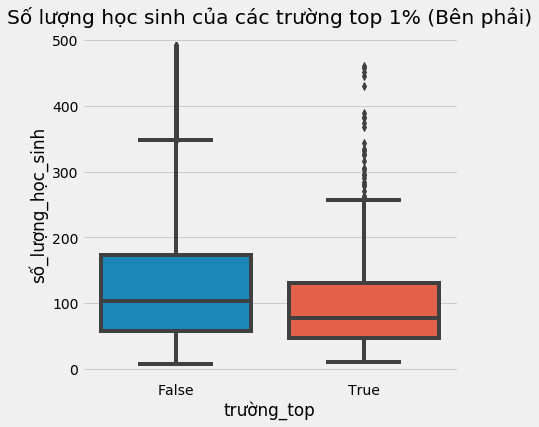

In [2]:
plot_data = (df
             .assign(top_school = df["avg_score"] >= np.quantile(df["avg_score"], .99))
             [["top_school", "number_of_students"]]
             .query(f"number_of_students<{np.quantile(df['number_of_students'], .98)}")) # remove outliers

plt.figure(figsize=(6,6))
sns.boxplot(x="top_school", y="number_of_students", data=plot_data).set(
    xlabel="trường_top", 
    ylabel="số_lượng_học_sinh"
)
plt.title("Số lượng học sinh của các trường top 1% (Bên phải)");

Một kết luận tự nhiên rút ra từ quan sát trên là quy mô trường học nhỏ dẫn đến kết quả học tập tốt hơn. Trực giác mách bảo ta kết luận này hợp lý vì nếu một giáo viên đảm nhiệm ít học sinh hơn thì họ có thể quan tâm hơn đến mỗi học sinh. Nhưng điều này có liên quan gì đến công thức Moivre? Và tại sao nó lại nguy hiểm?

Chà, việc này sẽ trở nên nguy hiểm khi mọi người bắt đầu có những quyết định quan trọng và đắt đỏ dựa trên thông tin này. Trong bài báo khoa học của mình, Howard tiếp tục đưa ra dẫn chứng: 

"Vào những năm 1990, việc giảm quy mô trường học trở nên phổ biến. Nhiều tổ chức từ thiện và cơ quan chính phủ đã tài trợ cho việc chia nhỏ các trường quy mô lớn dựa trên luận cứ học sinh tại các trường quy mô nhỏ chiếm đa số trong các nhóm có điểm thi cao." 

Tuy nhiên, cái mà người ta quên mất là không nhìn vào 1% những trường xếp cuối. Và nếu làm như vậy, họ sẽ nhận ra rằng những trường này cũng có rất ít học sinh!

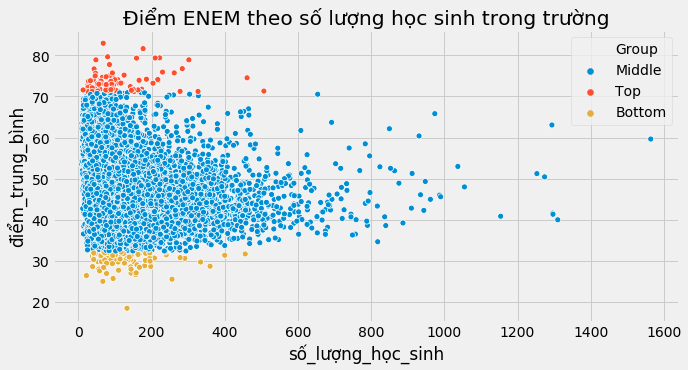

In [3]:
q_99 = np.quantile(df["avg_score"], .99)
q_01 = np.quantile(df["avg_score"], .01)

plot_data = (df
             .sample(10000)
             .assign(Group = lambda d: np.select([d["avg_score"] > q_99, d["avg_score"] < q_01],
                                                 ["Top", "Bottom"], "Middle")))
plt.figure(figsize=(10,5))
sns.scatterplot(y="avg_score", x="number_of_students", hue="Group", data=plot_data).set(
    xlabel="số_lượng_học_sinh", 
    ylabel="điểm_trung_bình"
)
plt.title("Điểm ENEM theo số lượng học sinh trong trường");

Điều mà ta quan sát được qua biểu đồ phía trên chính xác là những điều được dự đoán theo công thức Moivre. Khi số lượng học sinh tăng, điểm trung bình trở nên chính xác hơn. Những trường có rất ít học sinh có thể có điểm (trung bình) rất cao và cũng có thể có điểm rất thấp chỉ đơn giản là do sự ngẫu nhiên. Điều này khó xảy ra hơn với các trường có quy mô lớn. Công thức Moivre đề cập tới một sự thật cơ bản về tính xác thực của thông tin và số liệu: chúng luôn luôn không chính xác. Vậy không chính xác đến mức độ nào? 

Thống kê là môn khoa học giải quyết sự không chính xác này để ta có thể dự đoán được chúng. Như Taleb viết trong cuốn sách của mình - "Trò đùa của sự ngẫu nhiên":

> Xác suất không chỉ đơn thuần là một phép tính tỷ lệ những mặt lẻ trên một con xúc xắc hay những biến thể phức tạp hơn; xác suất là việc thừa nhận sự không chắc chắn trong hiểu biết của chúng ta và phát triển các phương pháp để giải quyết sự không chắc chắn đó.

Một cách để định lượng không chắc chắn là dùng phương sai của các ước lượng. Phương sai cho biết độ phân tán của các quan sát so với giá trị trung bình. Như được chỉ ra bởi công thức Moivre, sự không chắc chắn thu hẹp khi lượng dữ liệu quan sát được tăng lên. Điều này nghe hợp lý đúng không? Nếu ta quan sát thấy rất nhiều học sinh xuất sắc tại một trường, ta tự tin hơn để khẳng định rằng đó thật sự là một ngôi trường tốt. Tuy nhiên, nếu ta chỉ quan sát được một ngôi trường với 10 học sinh và 8 trong số đó có thành tích tốt, ta cần thận trọng hơn khi đưa ra kết luận. Có thể do ngẫu nhiên trường đó có một vài học sinh có kết quả tốt. 

Biểu đồ có dạng hình tam giác phía trên miêu tả lại chính xác câu chuyện này một cách trực quan. Nó cho thấy những ước lượng về thành tích của các trường có phương sai lớn như thế nào khi kích thước mẫu nhỏ. Và phương sai giảm đi khi kích thước mẫu tăng. Nó không chỉ đúng với điểm trung bình tại một trường học, mà còn đúng với bất kỳ các thống kê đặc trưng nào, bao gồm cả ATE mà ta thường muốn ước lượng.


## Sai số chuẩn của các ước lượng
Vì đây chỉ là phần ôn tập lại về thống kê, tôi sẽ đi nhanh hơn một chút. Nếu bạn chưa quen với phân phối, phương sai, và sai số chuẩn, bạn vẫn có thể tiếp tục theo dõi cuốn sách này nhưng có thể cần thêm một số tài liệu bổ sung. Các khoá học online căn bản về thống kê do MIT cung cấp có thể xây dựng cho bạn một nền tảng kiến thức khá tốt. 

Ở phần trước, chúng ta đã ước lượng tác động can thiệp trung bình \\(E[Y_1-Y_0]\\) bằng chênh lệch giữa giá trị trung bình của nhóm được can thiệp và nhóm đối chứng \\(E[Y|T=1]-E[Y|T=0]\\). Trong ví dụ ở bài trước, chúng ta đã tính toán $ATE$ cho các lớp học online. Một tác động tiêu cực được ghi nhận, cụ thể, lớp học online khiến cho học sinh có kết quả kém hơn 5 điểm so với học sinh trong lớp học truyền thống. Hãy cùng xem xét liệu tác động này có ý nghĩa thống kê hay không. 

Để làm được điều này, ta cần phải ước lượng sai số chuẩn. Ta đã biết $n$, kích thước mẫu. Để ước lượng độ lệch chuẩn, ta có thể áp dụng công thức

$
\hat{\sigma}=\frac{1}{N-1}\sum_{i=0}^N (x-\bar{x})^2
$

trong đó \\(\bar{x}\\) là giá trị trung bình của \\(x\\). May mắn là hầu hết các phần mềm lập trình có thể giải phương trình này. Trong Pandas, ta có thể dùng phương pháp [std](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html). 

In [11]:
data = pd.read_csv("./data/online_classroom.csv")
online = data.query("format_ol==1")["falsexam"]
face_to_face = data.query("format_ol==0 & format_blended==0")["falsexam"]

def se(y: pd.Series):
    return y.std() / np.sqrt(len(y))

print("SE cho lớp học online :", se(online))
print("SE cho lớp học truyền thống:", se(face_to_face))

SE cho lớp học online : 1.5371593973041635
SE cho lớp học truyền thống: 0.8723511456319106


## Khoảng tin cậy
Sai số chuẩn của các ước lượng là sự đo lường độ tin cậy. Để hiểu chính xác ý nghĩa của nó, chúng ta cần phải "lặn sâu" vào "vùng nước xoáy" tranh luận của các trường phái thống kê. Theo trường phái cổ điển, dữ liệu ta có đơn giản chỉ đại diện cho một quy luật tạo lập dữ liệu. Có thể nói quá trình này mang tính trừu tượng và lý tưởng hoá. Nó được quyết định bởi những tham số thực không thay đổi, tuy nhiên ta không thể biết chính xác những tham số đó. Trong ví dụ về bài thi của học sinh, nếu ta thực hiện nhiều thử nghiệm và thu thập nhiều bộ dữ liệu, tất cả tập hợp lại thành quy luật tạo lập dữ liệu thực, tuy không chính xác hoàn toàn. Điều này giống với những gì Plato đã viết trong Học thuyết các mô thức của ông: 

```
Mỗi một [mô thức thiết yếu] tự biểu hiện trong sự kết hợp đa dạng với những hành động, vật chất, giữa các mô thức với nhau, và mỗi mô thức dường như lại bao gồm nhiều mô thức
```
Để hiểu điều này rõ hơn, giả sử ta có một phân phối thực trừu tượng về điểm thi của học sinh. Đây là một phân phối chuẩn với giá trị trung bình thực là 74 và độ lệch chuẩn thực là 2. Từ phân phối này, ta thực hiện 10000 thử nghiệm. Trong mỗi thử nghiệm, ta thu thập được 500 mẫu. Một số thử nghiệm sẽ có giá trị trung bình nhỏ hơn giá trị trung bình thực, một số sẽ lớn hơn. Nếu vẽ biểu đồ tần suất của chúng, ta có thể thấy rằng hầu hết giá trị trung bình của các thử nghiệm trùng với giá trị trung bình thực.  


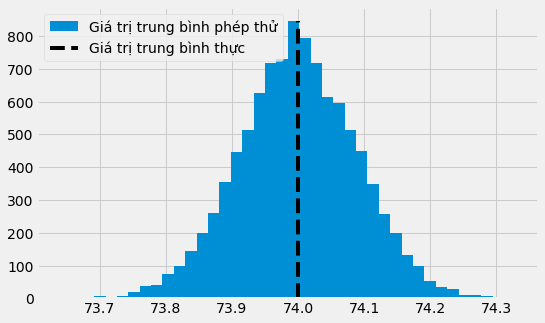

In [4]:
true_std = 2
true_mean = 74

n = 500
def run_experiment(): 
    return np.random.normal(true_mean,true_std, 500)

np.random.seed(42)

plt.figure(figsize=(8,5))
freq, bins, img = plt.hist([run_experiment().mean() for _ in range(10000)], bins=40, label="Giá trị trung bình phép thử")
plt.vlines(true_mean, ymin=0, ymax=freq.max(), linestyles="dashed", label="Giá trị trung bình thực")
plt.legend();

Lưu ý rằng chúng ta đang bàn về giá trị trung bình của các giá trị trung bình. Vì vậy, một cách ngẫu nhiên, một thử nghiệm có thể có giá trị trung bình thấp hoặc cao hơn so với giá trị trung bình thực. Điều này có nghĩa rằng ta không thể chắc chắn giá trị trung bình của các thử nghiệm khớp với giá trị trung bình thực và lý tưởng. Tuy nhiên, với sai số chuẩn, ta có thể tạo ra một khoảng chứa giá trị trung bình thực trong 95% lần thử.

Trong thực tế, ta không có điều kiện để mô phỏng cùng một thử nghiệm với nhiều bộ dữ liệu. Ta thường chỉ có duy nhất một bộ bộ dữ liệu. Thay vào đó, ta có thể xây dựng những khoảng tin cậy. Những khoảng tin cậy đề cập đến tỷ lệ phần trăm của xác suất, phổ biến nhất là 95%. Xác suất này cho biết có bao nhiêu khoảng tin cậy giả định mà ta xây dựng từ các thử nghiệm khác nhau chứa giá trị trung bình thực. Ví dụ, khoảng tin cậy 95% được tính toán từ nhiều nghiên cứu tương tự sẽ chứa giá trị trung bình thực trong 95% lần thử.

Để tính khoảng tin cậy, ta sử dụng định luật giới hạn trung tâm. Định luật này cho rằng giá trị trung bình của các thử nghiệm tuân theo phân phối chuẩn. Dựa trên lý thuyết thống kê, ta biết rằng 95% giá trị quan sát của phân phối chuẩn rơi vào khoảng chênh lệch 2 (chính xác là 1.96) lần độ lệch chuẩn từ giá trị trung bình. 

![normal_density](./data/img/stats-review/normal_dist.jpeg)

Sai số chuẩn của giá trị trung bình dùng để ước lượng phân phối của các giá trị trung bình trong các thí nghiệm được tiến hành. Vì vậy, nếu lấy sai số chuẩn nhân 2 rồi cộng và trừ từ giá trị trung bình của thử nghiệm, ta thu được một khoảng tin cậy 95%. 

In [6]:
np.random.seed(321)
exp_data = run_experiment()
exp_se = exp_data.std() / np.sqrt(len(exp_data))
exp_mu = exp_data.mean()
ci = (exp_mu - 2 * exp_se, exp_mu + 2 * exp_se)
print(ci)

(73.82718114045632, 74.17341543460314)


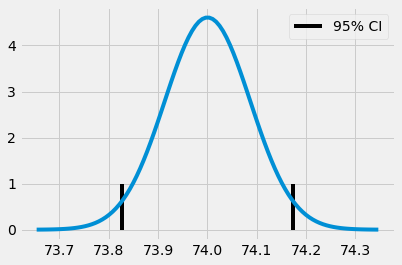

In [7]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="95% CI")
plt.legend()
plt.show()

Chúng ta không nhất thiết phải giới hạn trong khoảng tin cậy 95%, mà có thể sử dụng khoảng tin cậy 99% bằng việc quyết định xem nên nhân độ lệch chuẩn lên bao nhiêu lần để chứa 99% mật độ một phân phối chuẩn. 

Hàm `ppf` trong python là nghịch đảo của CDF. Vì vậy, `ppf(0.5)` trả về giá trị 0.0 có nghĩa rằng 50% giá trị quan sát của phân phối chuẩn nhỏ hơn 0.0. Tương tự, với khoảng tin cậy 99,5% ta sẽ tìm được giá trị `z` sao cho 99,5% giá trị quan sát của phân phối chuẩn nhỏ hơn giá trị này, hay 0,05% giá trị quan sát lớn hơn giá trị này. Nếu lấy giá trị `z` ở cả hai đầu của phân phối chuẩn, chúng ta thu được 99% giá trị quan sát rơi vào khoảng giữa hai đầu giá trị này. Khoảng tin cậy 99% có thể được biểu diễn như sau. 

In [8]:
from scipy import stats
z = stats.norm.ppf(.995)
print(z)
ci = (exp_mu - z * exp_se, exp_mu + z * exp_se)
ci

2.5758293035489004


(73.7773381773405, 74.22325839771896)

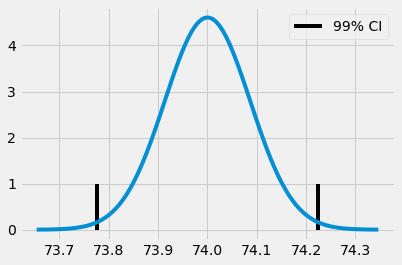

In [9]:
x = np.linspace(exp_mu - 4*exp_se, exp_mu + 4*exp_se, 100)
y = stats.norm.pdf(x, exp_mu, exp_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=1)
plt.vlines(ci[0], ymin=0, ymax=1, label="99% CI")
plt.legend()
plt.show()

Back to our classroom experiment, we can construct the confidence interval for the mean exam score for both the online and face to face students' group

  Quay trở lại với ví dụ về lớp học, chúng ta có thể xây dựng khoảng tin cậy cho điểm thi trung bình của cả hai lớp học online và lớp học truyền thống. 

In [13]:
def ci(y: pd.Series):
    return (y.mean() - 2 * se(y), y.mean() + 2 * se(y))

print("95% CI cho lớp học online:", ci(online))
print("95% cho lớp học truyền thống:", ci(face_to_face))

95% @@CI@@ cho lớp học online: (70.56094429049804, 76.7095818797147)
95% cho lớp học truyền thống: (76.80278229206948, 80.29218687459712)


Chúng ta thấy rằng CI 95% của hai nhóm không trùng nhau. Cận dưới của CI cho lớp học truyền thống cao hơn cận trên của CI cho lớp học online. Đây là bằng chứng thể hiện rằng kết quả này không phải là ngẫu nhiên. Kết quả học tập giảm đáng kể do tác động nhân quả từ việc chuyển phương thức học từ lớp học truyền thống sang lớp học online. 

Tóm lại, khoảng tin cậy là một cách để xác định không chắc chắn của các ước lượng. kích thước mẫu càng nhỏ, sai số chuẩn càng lớn và khoảng tin cậy càng rộng. Một lời khuyên hữu ích là bạn nên luôn luôn nghi ngờ các ước lượng mà không kèm theo chỉ số tính toán sự không chắc chắn. Bởi việc tính toán nó không hề khó, sự che giấu hoặc thiếu sót trong việc trình bày các khoảng tin cậy có thể là dấu hiệu cho những mục đích không mấy tốt đẹp hoặc đơn giản là do sự thiếu kiến thức. Cả hai đều đáng lo ngại như nhau.

![img](data/img/stats-review/ci_xkcd.png)

Cuối cùng, việc diễn giải khoảng tin cậy phức tạp hơn chúng tôi tưởng. Ví dụ, ta không nên khẳng định một khoảng tin cậy 95% cụ thể chứa giá trị trung bình thực của tổng thể với xác suất 95%. Lý do là trong trường phái cổ điển, thống kê sử dụng khoảng tin cậy, giá trị trung bình của tổng thể được coi như một hằng số tổng thể thực. Vì vậy nó có thể rơi vào hoặc không nằm trong khoảng tin cậy cụ thể của chúng ta. Hay nói cách khác, khoảng tin cậy cụ thể của chúng ta có thể chứa hoặc không chứa giá trị trung bình thực. Nếu có, xác suất để chứa giá trị trung bình thực sẽ là 100% chứ không phải 95%. Ngược lại, xác suất sẽ là 0%. Thay vào đó, con số 95% trong khoảng tin cậy đề cập đến tần suất mà các khoảng tin cậy được tính toán trong nhiều nghiên cứu, chứa giá trị trung bình thực. 95% là độ tin cậy cho thuật toán được sử dụng để tính CI 95%, không phải cho một khoảng cụ thể. 

Như đã trình bày, với tư cách là một nhà Kinh tế học (các nhà thống kê làm ơn hãy mặc kệ tôi!), tôi cho rằng sự cứng nhắc này không mấy ý nghĩa. Trong thực tế, có rất nhiều người khẳng định rằng một khoảng tin cậy cụ thể chứa giá trị trung bình thực với xác suất 95%. Mặc dù sai, nhưng điều này không gây hậu quả nghiêm trọng bởi nó vẫn đặt ra một mức độ chính xác cho không chắc chắn trong ước lượng. Hơn nữa, nếu nhìn từ trường phái Bayesian và sử dụng khoảng tin cậy Bayes thay cho khoảng tin cậy, có thể nói rằng khoảng tin cậy cụ thể đó chứa phân phối giá trị trung bình trong 95% lần thử. Ngoài ra, từ những kinh nghiệm thực tế của mình, với kích thước mẫu phù hợp, khoảng tin cậy Bayes gần với khoảng tin cậy hơn so với những gì những người theo hai trường phái Bayesian và trường phái cổ điển muốn thừa nhận. Vì vậy, nếu ít nhất quan điểm của tôi có giá trị, bạn có thể thoải mái trong việc diễn giải khoảng tin cậy của bạn. Tôi không phán xét việc bạn khẳng định rằng chúng chứa giá trị trung bình thực với xác suất 95%. Chỉ xin đừng quên việc đề cập đến chúng trong các ước lượng nếu bạn không muốn mình trông giống như một kẻ tay mơ!

## Kiểm định giả thuyết
Một cách khác để xác định sự không chắc chắn là đặt ra một giả thuyết để kiểm định: liệu sự chênh lệch giữa các giá trị trung bình có khác 0 (hoặc bất kỳ một giá trị nào khác) trên quan điểm thống kê hay không? Để làm được điều này, chúng ta cần nhớ lại rằng tổng hoặc hiệu của 2 phân phối chuẩn cũng là phân phối chuẩn. Giá trị trung bình của phân phối mới sẽ bằng tổng hoặc hiệu của hai phân phối ban đầu, trong khi phương sai luôn luôn bằng tổng phương sai của hai phân phối ban đầu. 

$
N(\mu_1, \sigma_1^2) - N(\mu_2, \sigma_2^2) = N(\mu_1 - \mu_2, \sigma_1^2 + \sigma_2^2)
$

$
N(\mu_1, \sigma_1^2) + N(\mu_2, \sigma_2^2) = N(\mu_1 + \mu_2, \sigma_1^2 + \sigma_2^2)
$

Nếu bạn chưa bắt gặp kiến thức này, không vấn đề! Chúng ta hoàn toàn có thể dùng code và dữ liệu mô phỏng để kiểm tra:

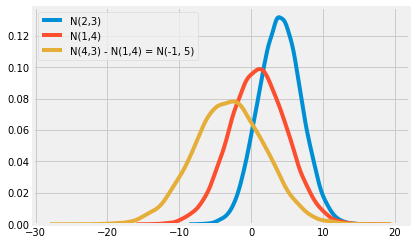

In [ ]:
np.random.seed(123)
n1 = np.random.normal(4, 3, 30000)
n2 = np.random.normal(1, 4, 30000)
n_diff = n2 - n1
sns.distplot(n1, hist=False, label="N(2,3)")
sns.distplot(n2, hist=False, label="N(1,4)")
sns.distplot(n_diff, hist=False, label=f"N(4,3) - N(1,4) = N(-1, 5)") #SAI N(2,3)
plt.show()

Nếu lấy phân phối giá trị trung bình của một nhóm trừ đi phân phối giá trị trung bình của một nhóm khác, ta thu được phân phối thứ ba. Giá trị trung bình của phân phối thứ ba sẽ là hiệu của giá trị trung bình của hai phân phối đầu, và độ lệch chuẩn của phân phối thứ ba sẽ là căn bậc hai của tổng độ lệch chuẩn của hai phân phối đầu. 

$
\mu_{diff} = \mu_1 + \mu_2
$

$
SE_{diff} = \sqrt{SE_1 + SE_2} = \sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}
$

Quay trở lại ví dụ về lớp học, ta xây dựng phân phối thứ ba này dựa trên sự khác biệt giữa lớp học online và lớp học truyền thống. Từ đó, việc xây dựng CI 95% trở nên vô cùng đơn giản.

In [ ]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
ci = (diff_mu - 1.96*diff_se, diff_mu + 1.96*diff_se)
print(ci)

(-8.376410208363385, -1.4480327880905248)


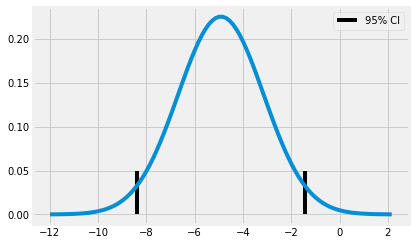

In [ ]:
x = np.linspace(diff_mu - 4*diff_se, diff_mu + 4*diff_se, 100)
y = stats.norm.pdf(x, diff_mu, diff_se)
plt.plot(x, y)
plt.vlines(ci[1], ymin=0, ymax=.05)
plt.vlines(ci[0], ymin=0, ymax=.05, label="95% CI")
plt.legend()
plt.show()

Dựa vào đây, có thể khẳng định rằng giá trị chênh lệch thực giữa lớp học online và lớp học truyền thống rơi vào khoảng -8.37 và -1.44 với 95% độ tin cậy. Thống kê z có thể được tính bằng cách lấy giá trị trung bình của phân phối thứ ba chia cho sai số chuẩn của phân phối thứ ba. 

$
z = \dfrac{\mu_{diff} - H_{0}}{SE_{diff}} = \dfrac{(\mu_1 - \mu_2) - H_{0}}{\sqrt{\sigma_1^2/n_1 + \sigma_2^2/n_2}}
$

Trong đó \\(H_0\\) là giá trị chúng ta muốn kiểm định sự chênh lệch

Thống kê z là thước đo mức độ chênh lệch mà ta quan sát được. Để kiểm định giả thuyết rằng giá trị chênh lệch của các giá trị trung bình có khác 0 về mặt thống kê, ta sử dụng lập luận phản chứng. Giả sử điều ngược lại là đúng, trong trường hợp này, giá trị chênh lệch sẽ bằng 0. Giả thuyết này có thể được gọi là giả thuyết không, \\(H_0\\). Đến đây ta có thể sẽ tự đặt ra một câu hỏi "liệu có khả năng sẽ quan sát được giá trị chênh lệch này nếu giá trị chênh lệch thực là 0?" Theo ngôn ngữ toán học thống kê, có thể hiểu câu hỏi này như việc kiểm tra xem thống kê z cách giá trị 0 bao nhiêu.

Dưới giả thuyết \\(H_0\\), thống kê z tuân theo phân phối chuẩn. Vì vậy, nếu giá trị chênh lệch thực sự bằng 0, thống kê z rơi vào giữa hai độ lệch chuẩn của giá trị trung bình trong 95% lần thử. Hệ quả trực tiếp của điều này là nếu thống kê z rơi ra ngoài cận trện hoặc cận dưới, có thể bác bỏ \\(H_0\\). 

Hãy cùng kiểm chứng điều này trong ví dụ lớp học.

In [ ]:
z = diff_mu / diff_se
print(z)

-2.7792810791031224


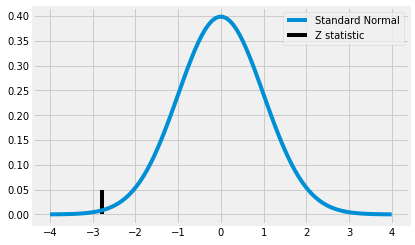

In [ ]:
x = np.linspace(-4,4,100)
y = stats.norm.pdf(x, 0, 1)
plt.plot(x, y, label="Phân phối chuẩn hoá")
plt.vlines(z, ymin=0, ymax=.05, label="Thống kê z")
plt.legend(loc=1, prop={'size': 10.5})
plt.show()

Đây dường như là một cực trị. Thống kê z lớn hơn 2, cho thấy rằng có ít hơn 5% cơ hội ta quan sát được một thống kê z như vậy nếu không có sự khác biệt giữa các nhóm lớp học. Điều này dẫn tới một kết luận rằng sự thay đổi từ lớp học truyền thống sang lớp học online gây ra sự giảm sút về thành tích học tập có ý nghĩa về mặt thống kê.

Một điều thú vị khác về kiểm định giả thuyết chính là nó bớt rườm rà hơn việc kiểm tra xem liệu CI 95% từ được can thiệp và đối chứng có giao nhau hay không. Nói cách khác, nếu khoảng tin cậy của hai nhóm giao nhau, thì vẫn có thể xảy ra trường hợp kết quả có ý nghĩa thống kê. Ví dụ, giả sử nhóm lớp học truyền thống có điểm trung bình là 74 và sai số chuẩn là 7, và nhóm lớp học online có điểm trung bình là 71 và sai số chuẩn là 1.

In [14]:
cont_mu, cont_se =  (71, 1)
test_mu, test_se = (74, 7)

diff_mu = test_mu - cont_mu
diff_se = np.sqrt(cont_se + cont_se)

print("Nhóm đối chứng 95% CI:", (cont_mu-1.96*cont_se, cont_mu+1.96*cont_se))
print("Nhóm được can thiệp 95% CI:", (test_mu-1.96*test_se, test_mu+1.96*test_se))
print("Chênh lệch 95% CI:", (diff_mu-1.96*diff_se, diff_mu+1.96*diff_se))

@@Control group@@ 95% @@CI@@: (69.04, 72.96)
@@Test group@@ 95% @@CI@@: (60.28, 87.72)
Chênh lệch 95% CI: (0.22814141774873375, 5.771858582251266)


Nếu chúng ta xây dựng khoảng tin cậy cho các nhóm này, chúng sẽ giao nhau. Cận trên cho khoảng tin cậy 95% của nhóm lớp học online là 72.96 và cận dưới cho lớp học truyền thống là 60.28. Tuy nhiên, khi tính khoảng tin cậy 95% cho giá trị chênh lệch giữa hai nhóm, chúng ta có thể quan sát thấy rằng nó không chứa giá trị 0. Tóm lại, mặc dù các khoảng tin cậy của từng nhóm giao nhau, giá trị chênh lệch vẫn khác 0 về mặt thống kê. 

## Trị số p
Như đã đề cập trước đó, có ít hơn 5% cơ hội chúng ta có thể quan sát được một cực trị như vậy nếu giá trị chênh lệch giữa lớp học online và lớp học truyền thống bằng 0. Nhưng liệu chúng ta có thể ước lượng chính xác xác suất đó bằng bao nhiêu? Làm thế nào chúng ta có thể quan sát được một cực trị như vậy? Sử dụng trị số p!

Cũng giống như khoảng tin cậy, định nghĩa thực sự của trị số p có thể rất khó hiểu. Sau đây là định nghĩa mà tôi đã sao chép từ Wikipedia: "trị số p là xác suất thu được kết quả thử nghiệm ít nhất bằng với kết quả thực sự quan sát được trong quá trình thử nghiệm, giả định rằng giả thuyết không (\\(H_0\\)) đúng". Đừng để sự phức tạp đánh lừa bạn. Trong thực tế, trị số p khá dễ áp dụng. 

Để xác định trị số p, ta cần tính diện tích dưới phân phối chuẩn hoá trước và sau thống kê z. May mắn thay, ta có thể nhờ máy tính làm công việc này đơn giản bằng cách thay thống kê z vào CDF của phân phối chuẩn hoá. 



In [ ]:
print("Trị số p:", stats.norm.cdf(z))

P-value: 0.0027239680835563383


Điều này có nghĩa là chỉ có 0.2% cơ hội quan sát được giá trị @z statistic@ lớn đến thế nếu giá trị chênh lệch bằng 0. Một điểm thú vị của trị số p là chúng ta không cần phải xác định một khoảng tin cậy, như 95% hoặc 99%. Tuy nhiên chúng ta hoàn toàn có thể xác định chính xác độ tin cậy mà thử nghiệm của chúng ta sẽ được chấp nhận hay bị bác bỏ dựa trên trị số p. Ví dụ, với trị số p bằng 0.0027, chúng ta biết rằng sự khác biệt giữa hai nhóm lớp học có ý nghĩa thống kê tới mức 0.2%. Vì vậy, trong khi CI 95% và CI 99% cho giá trị chênh lệch đều không chứa giá trị 0, CI 99,9% hoàn toàn có thể. 

In [ ]:
diff_mu = online.mean() - face_to_face.mean()
diff_se = np.sqrt(face_to_face.var()/len(face_to_face) + online.var()/len(online))
print("95% CI:", (diff_mu - stats.norm.ppf(.975)*diff_se, diff_mu + stats.norm.ppf(.975)*diff_se))
print("99% CI:", (diff_mu - stats.norm.ppf(.995)*diff_se, diff_mu + stats.norm.ppf(.995)*diff_se))
print("99.9% CI:", (diff_mu - stats.norm.ppf(.9995)*diff_se, diff_mu + stats.norm.ppf(.9995)*diff_se))

95% CI: (-8.376346553082909, -1.4480964433710017)
99% CI: (-9.46485353526404, -0.3595894611898709)
99.9% CI: (-10.728040658245558, 0.9035976617916459)


## Ý tưởng chủ đạo
Chúng ta đã thấy được tầm quan trọng của việc nắm vững công thức Moivre và sử dụng nó để xác định mức độ chắc chắn cho các ước lượng. Cụ thể, chúng ta đã khám phá ra các lớp học online gây ra sự giảm sút trong kết quả học tập so với lớp học truyền thống. Chúng ta cũng nhận thấy rằng đây là một kết quả có ý nghĩa thống kê. Để làm điều này, khoảng tin cậy của các giá trị trung bình cho hai nhóm lớp học được so sánh với nhau thông qua việc xây dựng khoảng tin cậy cho giá trị chênh lệch bằng cách kiểm định giả thuyết và sử dụng trị số p. Hãy gói gọn bài học hôm nay trong một phương trình duy nhất so sánh A/B testing.

In [15]:
def AB_test(test: pd.Series, control: pd.Series, confidence=0.95, h0=0):
    mu1, mu2 = test.mean(), control.mean()
    se1, se2 = test.std() / np.sqrt(len(test)), control.std() / np.sqrt(len(control))
    
    diff = mu1 - mu2
    se_diff = np.sqrt(test.var()/len(test) + control.var()/len(control))
    
    z_stats = (diff-h0)/se_diff
    p_value = stats.norm.cdf(z_stats)
    
    def critial(se): return -se*stats.norm.ppf((1 - confidence)/2)
    
    print(f"Nhóm được can thiệp {confidence*100}% CI: {mu1} +- {critial(se1)}")
    print(f"Nhóm đối chứng{confidence*100}% CI: {mu2} +- {critial(se2)}")
    print(f"Nhóm được can thiệp-đối chứng {confidence*100}% CI: {diff} +- {critial(se_diff)}")
    print(f"Thống Kê Z {z_stats}")
    print(f"Trị Số P {p_value}")
        
AB_test(online, face_to_face)

@@Test group@@ 95.0% CI: 73.63526308510637 +- 3.0127770572134565
@@Control group@@95.0% CI: 78.5474845833333 +- 1.7097768273108005
Nhóm được can thiệp-đối chứng 95.0% CI: -4.912221498226927 +- 3.4641250548559537
@@Z Statistic@@ -2.7792810791031064
@@P-Value@@ 0.0027239680835564706


Vì hàm số này đã đủ sức khái quát, chúng ta có thể tiến hành kiểm định các giả thuyết không khác. Ví dụ, chúng ta có thể bác bỏ giả thuyết giá trị chênh lệch giữa lớp học online và lớp học truyền thống là -1. Với kết quả nhận được, có thể khẳng định rằng với độ tin cậy 95% giá trị chênh lệch lớn hơn -1. Tuy nhiên, chúng ta không thể khẳng định điều tương tự với độ tin cậy 99%:


In [16]:
AB_test(online, face_to_face, h0=-1)

@@Test group@@ 95.0% CI: 73.63526308510637 +- 3.0127770572134565
@@Control group@@95.0% CI: 78.5474845833333 +- 1.7097768273108005
Nhóm được can thiệp-đối chứng 95.0% CI: -4.912221498226927 +- 3.4641250548559537
@@Z Statistic@@ -2.2134920404560723
@@P-Value@@ 0.013431870694630667


## Tài liệu tham khảo
Tôi muốn dành chương này như lời cảm ơn tới Joshua Angrist, Alberto Abadie và Christopher Walters bởi lớp học Kinh tế lượng tuyệt vời của họ. Hầu hết những ý tưởng trong chương này được đúc kết từ những bài giảng của họ tại Hiệp hội kinh tế Hoa Kỳ. Lắng nghe các bài giảng của họ giúp tôi có thêm động lực đi qua một năm 2020 đầy khó khăn này.

* [Cross-Section Econometrics](https://www.aeaweb.org/conference/cont-ed/2017-webcasts)
* [Mastering Mostly Harmless Econometrics](https://www.aeaweb.org/conference/cont-ed/2020-webcasts)

Tôi cũng trích dẫn một cuốn sách tuyệt vời từ Angrist. Họ đã thành công trong việc chỉ cho tôi thấy rằng Kinh tế lượng, hoặc là Lượng theo cách gọi của họ, không chỉ cực kỳ hữu ích mà còn vô cùng thú vị. 

* [Mostly Harmless Econometrics](https://www.mostlyharmlesseconometrics.com/)
* [Mastering 'Metrics](https://www.masteringmetrics.com/)

Cuối cùng, không thể không nhắc đến cuốn sách được viết bởi Miguel Hernan và Jamie Robins. Nó là người bạn đồng hành đáng tin cậy giúp tôi tìm lời giải đáp cho những câu hỏi hóc búa nhất về tính nhân quả. 

* [Causal Inference Book](https://www.hsph.harvard.edu/miguel-hernan/causal-inference-book/)

Riêng chương này, tôi xin trích dẫn tài liệu tham khảo The [Most Dangerous Equation](https://www.researchgate.net/publication/255612702_The_Most_Dangerous_Equation), bởi Howard Wainer.

Cuối cùng, nếu bạn tò mò về cách giải thích chính xác các khái niệm thống kê đã được thảo luận ở chương này, mời bạn tìm đọc bài báo của
Greenland et al, 2016: [Statistical tests, P values, confidence intervals, and power: a guide to misinterpretations](https://link.springer.com/content/pdf/10.1007/s10654-016-0149-3.pdf).



# Bảng Từ Viết tắt 
|Viết tắt| Tiếng Anh | Tiếng Việt |
| --- | --- | --- | 
|CDF|Cumulative Distribution Function|Hàm Phân phối Tích lũy| 
|CI|Confidence Interval|Khoảng tin cậy| 


# Bảng Thuật ngữ 
| Thuật ngữ | Tiếng Anh |
| --- | --- | 
|biểu đồ tần suất|histogram| 
|bộ dữ liệu|dataset| 
|các thống kê đặc trưng|summary statistics| 
|cổ điển|frequentist| 
|cực trị|extreme value| 
|dữ liệu|data| 
|giá trị trung bình|mean| 
|giả thuyết không|null hypothesis| 
|khoảng tin cậy|confidence interval| 
|khoảng tin cậy bayes|probable interval| 
|kích thước mẫu|sample size| 
|làm sạch dữ liệu|data cleaning| 
|mẫu|sample| 
|nhóm được can thiệp|treatment group, test group| 
|nhóm đối chứng|control group, untreated group| 
|phân phối|distribution| 
|phân phối chuẩn|normal distribution| 
|phân phối chuẩn hoá|standard normal distribution| 
|phương sai|variance| 
|quy luật tạo lập dữ liệu|data generating process| 
|sai số chuẩn|standard error| 
|tham số|parameter| 
|thống kê|statistics| 
|thống kê z|z statistic| 
|trị số p|p-value| 
|tác động can thiệp trung bình|average treatment effect| 
|tần suất|frequency| 
|tổng thể|population| 
|xác suất|probability| 
|được can thiệp|treated| 
|định luật giới hạn trung tâm|central limit theorem| 
|đối chứng|untreated, non-treated| 
|độ lệch chuẩn|standard deviation| 
|độ tin cậy|confidence| 
